# DATA PRE-PROCESSING

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Mansi\summer Intern\Phishing_website_detection\Phishing_Legitimate_full.csv")

In [25]:
df.shape


(10000, 50)

In [6]:
# getting the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [7]:
# convert the data
float_cols = df.select_dtypes('float64').columns
for col in float_cols:
    df[col]=df[col].astype('float32')
    
int_cols = df.select_dtypes('int64').columns
for col in int_cols:
    df[col]=df[col].astype('int32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [12]:
# observe the random entries
df.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
5618,5619,3,1,1,82,4,0,0,0,0,...,0,0,0,1,-1,1,0,0,-1,0
9449,9450,4,2,2,54,2,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
759,760,2,0,2,29,0,0,0,0,0,...,0,0,0,1,1,-1,1,-1,-1,1
5364,5365,3,1,5,124,0,0,0,0,11,...,1,0,0,1,-1,1,0,0,0,0
7449,7450,3,2,3,65,3,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [13]:
# summary statistics
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dataset Exploration

<AxesSubplot:>

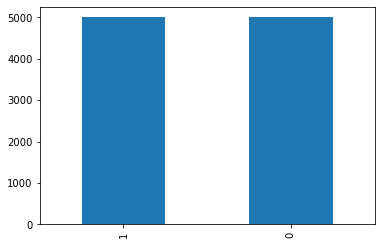

In [14]:
# Check for Balance/Imbalanced Data
df['CLASS_LABEL'].value_counts().plot(kind='bar')

In [15]:
# correlation Analysis
def corr_heatmap(df,start,end):
    y = df['CLASS_LABEL']
    temp = df.iloc[:,start:end]
    if 'id' in temp.columns:
        del temp['id']
    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(),annot=True,fmt='.2f')
    plt.show()

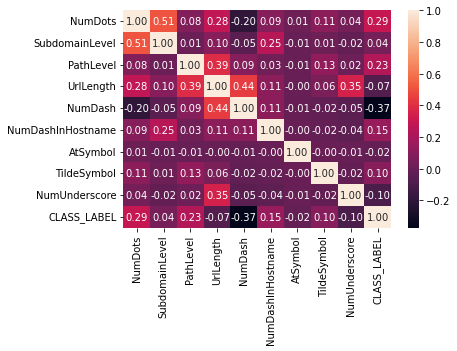

In [16]:
# correlation map for first 10 columns
corr_heatmap(df,0,10)

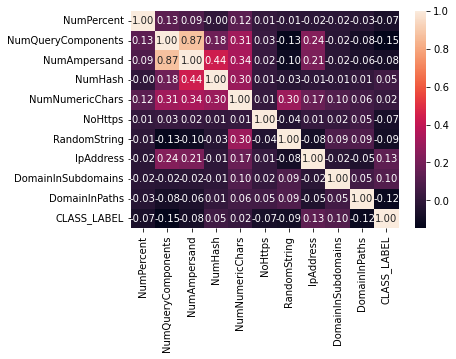

In [17]:
# correlation map from 10 to 20 columns
corr_heatmap(df,10,20)

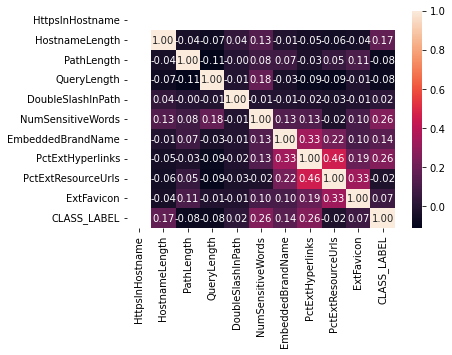

In [19]:
# correlation map from 20 to 30 columns
corr_heatmap(df,20,30)

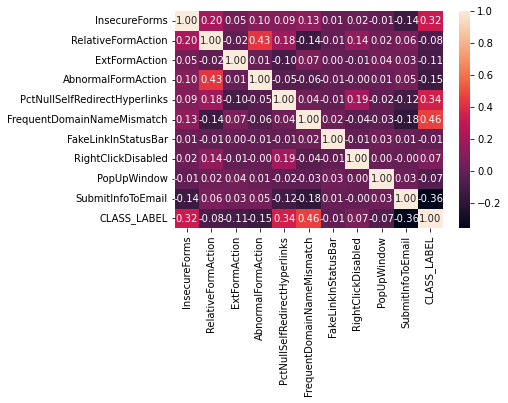

In [21]:
# correlation map from 30 to 40
corr_heatmap(df,30,40)

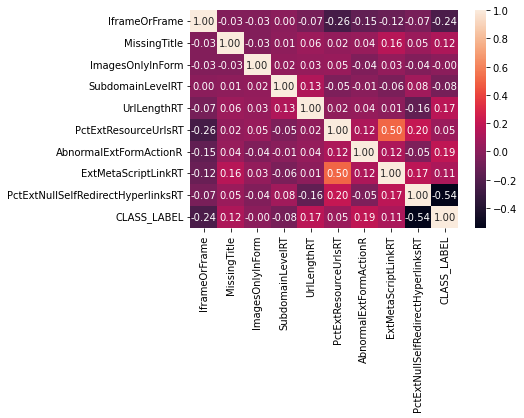

In [23]:
# correlation map from column 40 to 50
corr_heatmap(df,40,50)

# Feature Selection

In [26]:
# importing libraries
from sklearn.feature_selection import mutual_info_classif

In [27]:
X = df.drop(['id','CLASS_LABEL'],axis=1)
y = df['CLASS_LABEL']

In [28]:
discrete_features = X.dtypes == int

In [29]:
mi_scores = mutual_info_classif(X,y,discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores',index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.698160e-01
PctExtResourceUrls                    2.923763e-01
PctNullSelfRedirectHyperlinks         2.368403e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [33]:
def plot_mi_Scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("MI Scores")

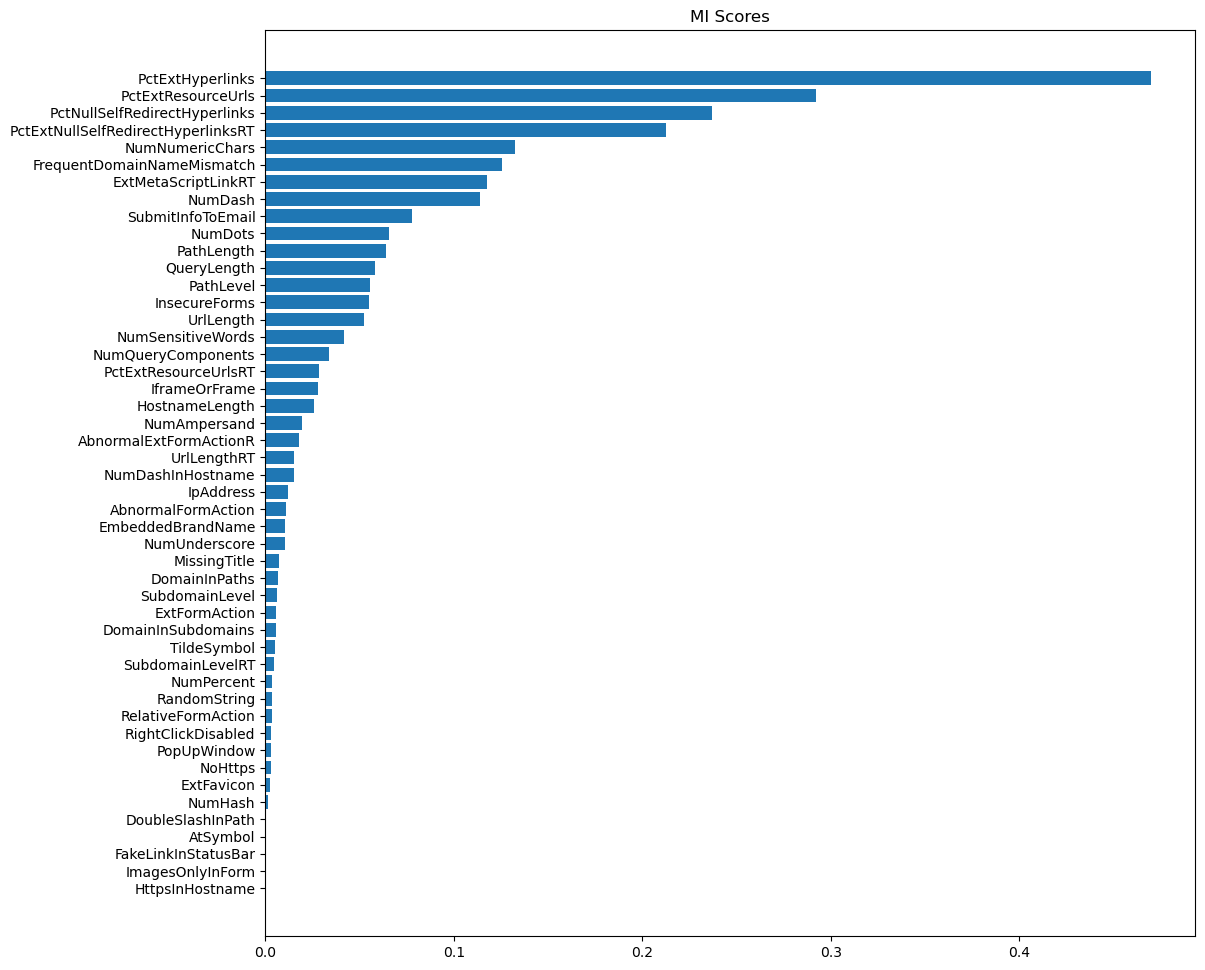

In [34]:
plt.figure(dpi=100, figsize=(12,12))
plot_mi_Scores(mi_scores)

In [35]:
No_features=27

# Split the preprocessed dataset

In [36]:
# import libraries
from sklearn.model_selection import train_test_split

In [37]:
top_features = mi_scores.sort_values(ascending=False).head(No_features).index.tolist()
X_features = df[top_features]
y = df['CLASS_LABEL']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y,test_size=0.2,shuffle=True)

In [41]:
# get the unique class labels
label = y.unique()

array([1, 0])

In [42]:
# store the results for further model training
%store X_train
%store X_test
%store y_train
%store y_test
%store label

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'label' (ndarray)
